資料來源：
https://archive.ics.uci.edu/ml/datasets/bank+marketing

# 資料預處理

In [1]:
# 首先將資料從 csv 讀成 pandas dataframe，確認資料筆數與欄位無誤。
import pandas as pd

df = pd.read_csv("./banking.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [2]:
# 確認是否有遺失值，可以看出資料當中都沒有遺失值。
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
y                 False
dtype: bool

In [3]:
# 確定資料型態
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [4]:
# 使用 duplicated() 函數找出資料當中有重複資料的筆數，一共發現有 12 筆的重複資料。
df_duplicate = df[df.duplicated()]
df_duplicate

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
17977,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
19339,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
24769,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
25634,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
28143,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0
29352,71,retired,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
29936,45,admin.,married,university.degree,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,-2.9,92.469,-33.6,1.072,5076.2,1
34333,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
37154,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
39423,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0


In [5]:
# 41188 - 12 = 41176 筆不重複資料。
df_NoDuplicate = df.drop_duplicates()
df_NoDuplicate

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


# 資料探索與視覺化

In [6]:
# pip install --upgrade matplotlib

In [7]:
pip show matplotlib

Name: matplotlib
Version: 3.7.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn
Note: you may need to restart the kernel to use updated packages.


In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

**y analysis**

In [9]:
# 目標變數 y 的次數分配。
df_NoDuplicate['y'].value_counts()

0    36537
1     4639
Name: y, dtype: int64

[Text(0, 0, '36537'), Text(0, 0, '4639')]

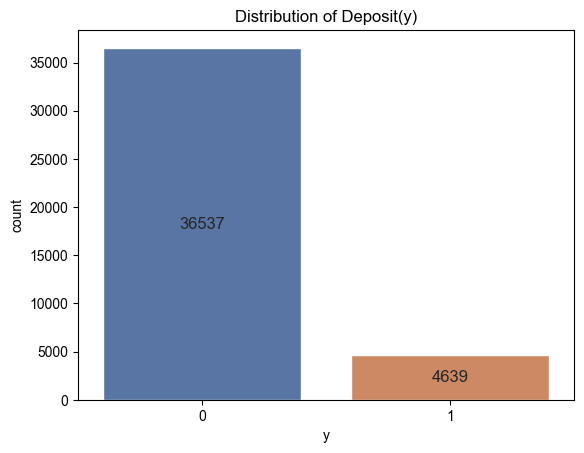

In [10]:
# 目標變數 y 的視覺化長條圖，可以看出沒有定存的筆數居多。
plt.title('Distribution of Deposit(y)')
sns.set_theme(style="whitegrid")
sns.countplot(x='y', data=df_NoDuplicate)
plt.bar_label(sns.countplot(x='y', data=df_NoDuplicate).containers[0], label_type='center')

**Job analysis**

In [11]:
# 欄位 'job' 的次數分配，可以看出 admin. 在資料當中佔最多的筆數。
df_NoDuplicate['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'blue-collar'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'management'),
  Text(3, 0, 'services'),
  Text(4, 0, 'retired'),
  Text(5, 0, 'admin.'),
  Text(6, 0, 'housemaid'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'entrepreneur'),
  Text(9, 0, 'self-employed'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'student')])

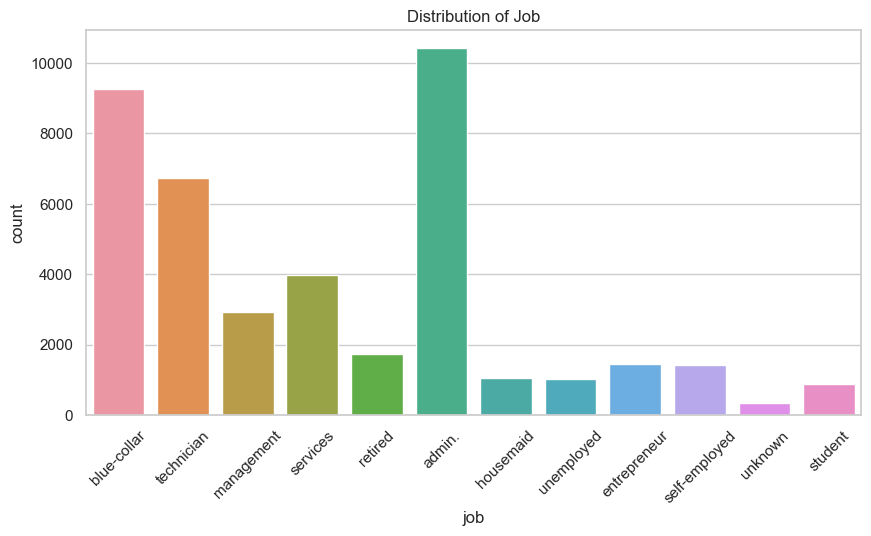

In [12]:
# 欄位 'job' 的長條圖。
plt.figure(figsize=(10, 5))
plt.title('Distribution of Job')
sns.set_theme(style="whitegrid")
sns.countplot(x='job', data=df_NoDuplicate)
plt.xticks(rotation = 45)

In [13]:
# 目標變數 y 與自變數 job 的交互次數分配表。
pd.crosstab(df_NoDuplicate.job, df_NoDuplicate.y)

y,0,1
job,,
admin.,9068,1351
blue-collar,8615,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1284,434
self-employed,1272,149
services,3644,323
student,600,275


Text(0, 0.5, 'Deposit of Purchase')

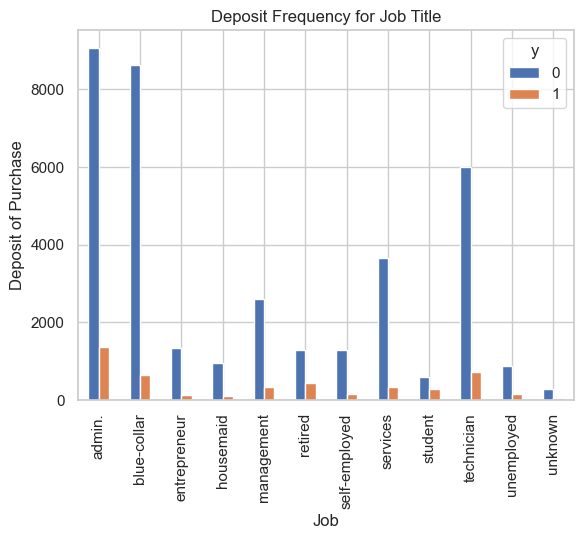

In [14]:
# 目標變數 y 與自變數 job 的交互次數分配表長條圖，可以看出各職業有無定存的次數分配。
pd.crosstab(df_NoDuplicate.job, df_NoDuplicate.y).plot(kind='bar')
plt.title('Deposit Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Deposit of Purchase')

In [15]:
table = pd.crosstab(df_NoDuplicate.job, df_NoDuplicate.y)

In [16]:
table.div(table.sum(1), axis=0)

y,0,1
job,,
admin.,0.870333,0.129667
blue-collar,0.931049,0.068951
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.747381,0.252619
self-employed,0.895144,0.104856
services,0.918578,0.081422
student,0.685714,0.314286


Text(0, 0.5, 'Proportion of Customers')

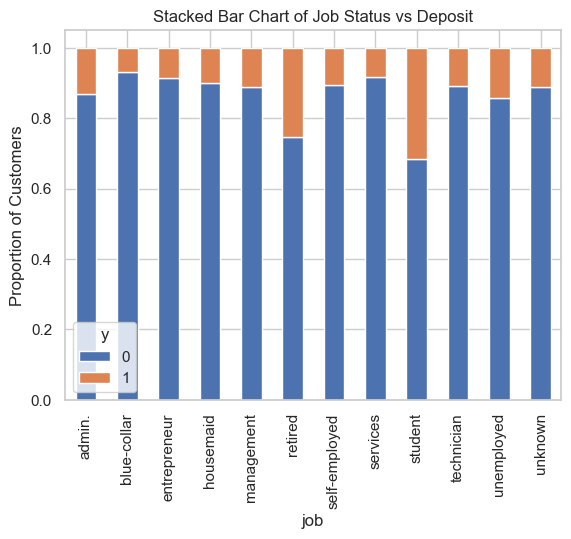

In [17]:
# 目標變數 y 與自變數 job 的交互次數比例分配表長條圖，可以看出在 retired 與 student 族群當中有定存的比例較高。
table.div(table.sum(1), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Job Status vs Deposit')
plt.ylabel('Proportion of Customers')

**age analysis**

In [18]:
# 數值型態的資料，因此可以進行敘述性統計分析。
df_NoDuplicate.age.describe()
# std is normalized by N-1 by default.

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

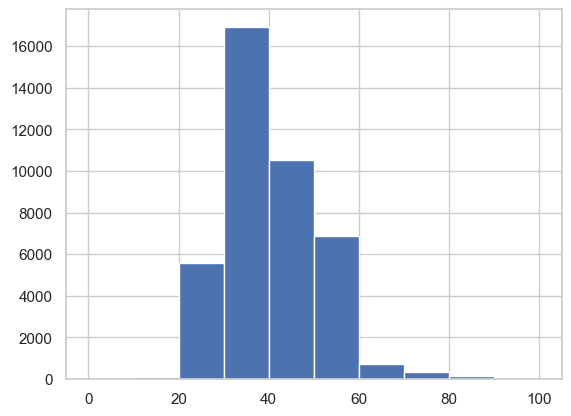

In [32]:
n, bins, patch = plt.hist(df_NoDuplicate.age, range=(0,100), bins=10)

bins

Text(0, 0.5, 'Count')

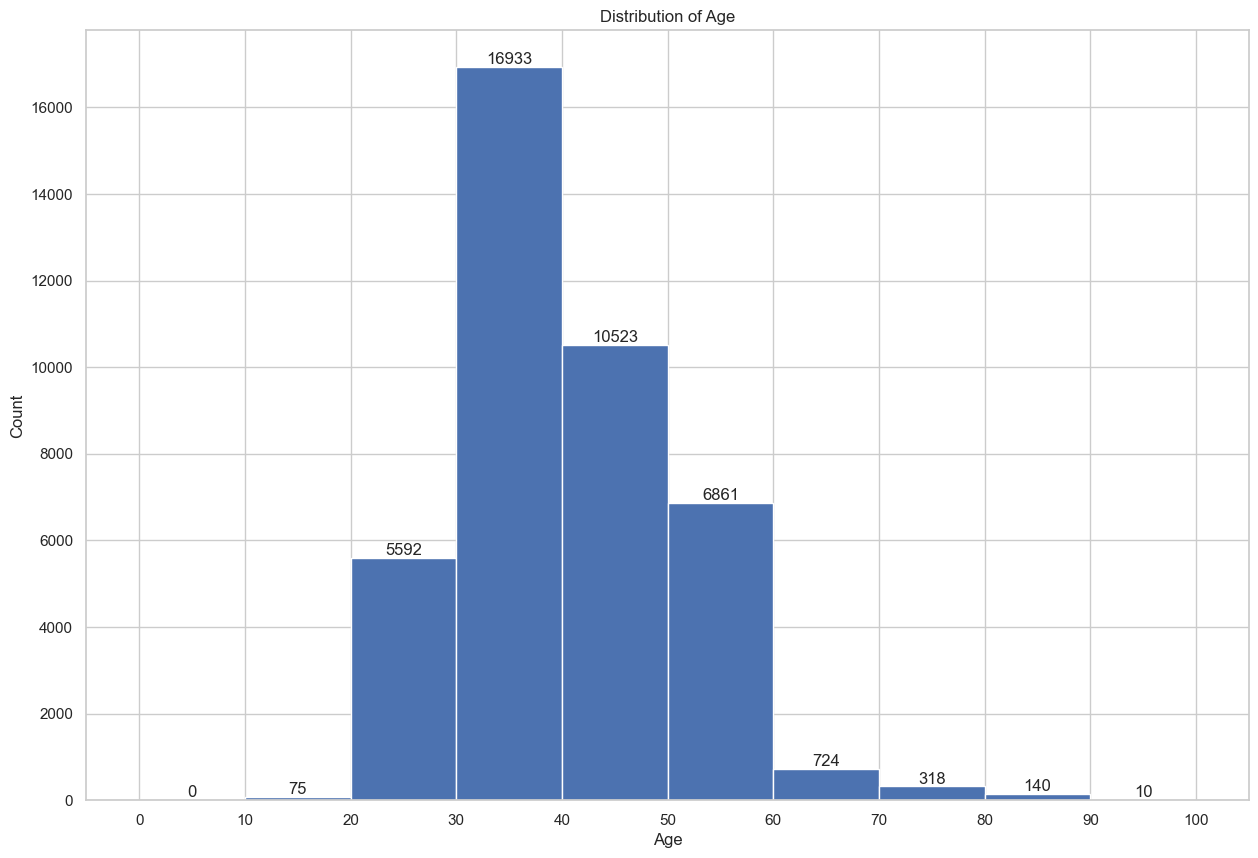

In [20]:
# age 的直方圖如下，資料多集中在 30-40 歲當中。
plt.figure(figsize=(15, 10))
df_NoDuplicate.age.hist(range=(0,100), bins=10)
plt.xticks(bins)
plt.bar_label(patch)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0.5, 0, 'Age')

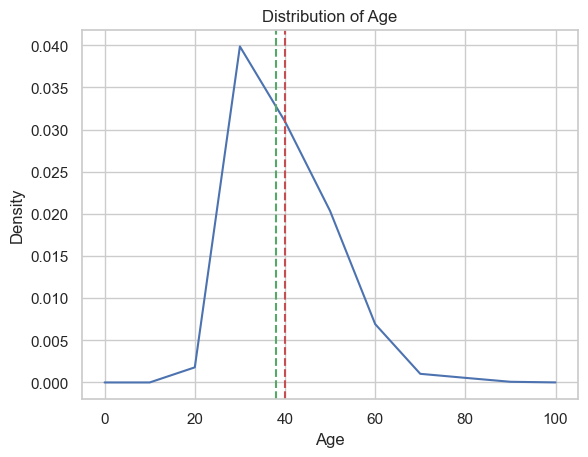

In [30]:
# 由機率密度函數圖形可看出尾巴(極端值)稍微是在右邊，因此是一個右偏的分佈。
# 平均數為紅色虛線，中位數為綠色虛線，平均數稍微大於中位數。
df_NoDuplicate.age.plot.density(ind=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.axvline(df_NoDuplicate.age.mean(), color='r', linestyle='dashed')
plt.axvline(df_NoDuplicate.age.median(), color='g', linestyle='dashed')
plt.title('Distribution of Age')
plt.xlabel('Age')

**education analysis**

In [ ]:
# 欄位 'education' 的次數分配，可以看出 university.degree 在資料當中佔最多的筆數。
df_NoDuplicate['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'unknown'),
  Text(2, 0, 'university.degree'),
  Text(3, 0, 'high.school'),
  Text(4, 0, 'basic.9y'),
  Text(5, 0, 'professional.course'),
  Text(6, 0, 'basic.6y'),
  Text(7, 0, 'illiterate')])

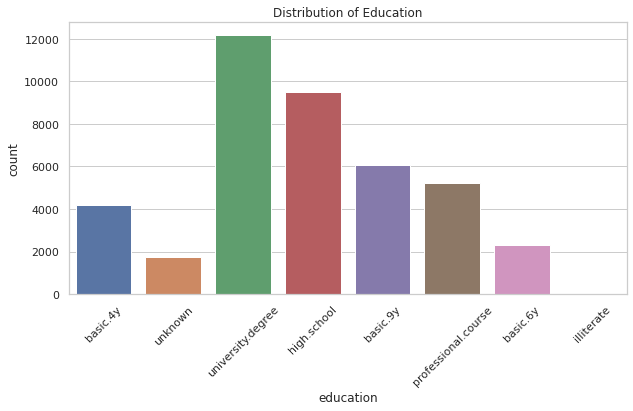

In [ ]:
# 欄位 'education' 的長條圖。
plt.figure(figsize=(10, 5))
plt.title('Distribution of Education')
sns.set_theme(style="whitegrid")
sns.countplot(x='education', data=df_NoDuplicate)
plt.xticks(rotation = 45)

In [ ]:
# 目標變數 y 與自變數 education 的交互次數分配表。
pd.crosstab(df_NoDuplicate.education, df_NoDuplicate.y)

y,0,1
education,,
basic.4y,3748,428
basic.6y,2103,188
basic.9y,5572,473
high.school,8481,1031
illiterate,14,4
professional.course,4645,595
university.degree,10495,1669
unknown,1479,251


Text(0, 0.5, 'Deposit of Purchase')

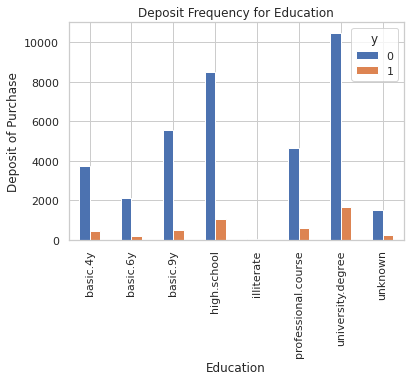

In [ ]:
# 目標變數 y 與自變數 education 的交互次數分配表長條圖，可以看出各教育程度有無定存的次數分配。
pd.crosstab(df_NoDuplicate.education, df_NoDuplicate.y).plot(kind='bar')
plt.title('Deposit Frequency for Education')
plt.xlabel('Education')
plt.ylabel('Deposit of Purchase')

**campaign analysis**

In [35]:
# 先製作出目標變數 y 與自變數 campaign 的交互次數分配表以供後續使用。
table_campaign = pd.crosstab(df_NoDuplicate.campaign, df_NoDuplicate.y)
table_campaign

y,0,1
campaign,,
1,15335,2299
2,9357,1211
3,4766,574
4,2401,249
5,1479,120
6,904,75
7,591,38
8,383,17
9,266,17


Text(0, 0.5, 'Proportion of Customers')

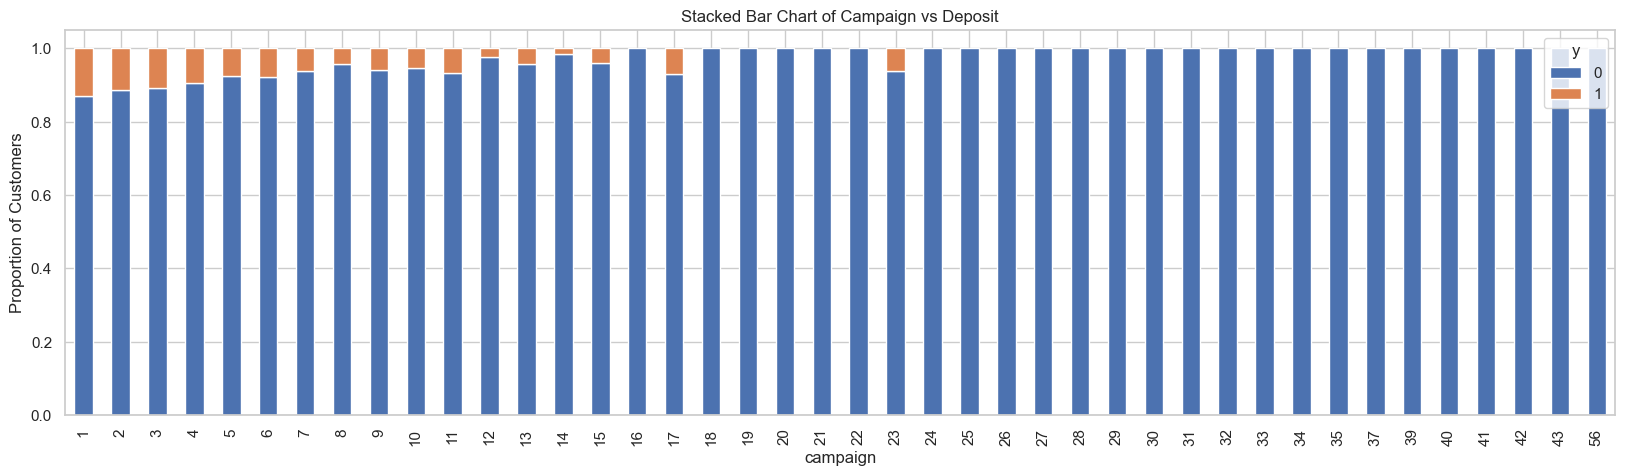

In [34]:
# 由此比例分配圖形可以看出，campaign 的次數越少定存的比例越高。
table_campaign.div(table_campaign.sum(1), axis=0).plot(kind='bar', stacked=True, figsize=(20, 5))
plt.title('Stacked Bar Chart of Campaign vs Deposit')
plt.ylabel('Proportion of Customers')